# Data Science Python

The goal is to learn about Python and commonly used Data Science libraries in the field.

We'll go over a bit of Python, Numpy and Pandas and then we'll load a WHO dataset and try to predict life expectancy given various factors.

## 1. Basic Python

#### Variables

Variables allow for storing any value with a label.
They can be used for later operations.

In [80]:
my_int = 3
my_float = 3.14
my_string = "hello"
my_list = [5, 23, 5]
my_dict = { "alice": 20, "bob": 21 }

print(my_int)
print(my_float)
print(my_string)
print(my_list[1])
print(my_dict["bob"])

3
3.14
hello
23
21


In [4]:
one = 1
two = 2

res = one + two
print(res)

3


#### Control flow

Control flow allows us to define conditions and branch of to different parts of code as we desire.

In [11]:
age = 20

if age < 18:
    print("You are under 18")
elif age >= 18 and age < 40:
    print("You are between 18 and 40")
else:
    print("You are over 40")

You are between 18 and 40


#### Loops

Repeat code until a condition is satisfied.

For loops are typically used to iterate over lists.

In [12]:
counter = 0
while counter < 5:
    print(counter)
    counter += 1

0
1
2
3
4


In [16]:
elems = [4, 334, 56]

for elem in elems:
    print(elem)

4
334
56


#### Functions

Functions allow to define routines that take inputs and return ouputs.

In [17]:
def add(input1, input2):
    return input1 + input2

res = add(1, 2)
print(res)

3


#### Classes

Classes allow for the creation of custom data types by composing already existing data types. The variables that compose a class are called attributes.

Functions, called methods in the context on a class can act upon the attributes of that class.

A class exists as an abstract blueprint. We say we instantiate a class when we define it into a variable. An instantiated class is called an object.

In [19]:
class Person:
    def __init__(self, name, age, university):
        self.name = name
        self.age = age
        self.university = university
        
    def is_over_18(self):
        return self.age >= 18
    
    def is_at_imperial(self):
        return self.university == 'imperial'
    
    def present(self):
        return f"Hi I'm {self.name}, I'm {self.age} and I study at {self.university}"

In [20]:
alice = Person("alice", 20, "imperial")
bob = Person("bob", 17, "ucl")

print(alice.is_over_18())
print(alice.present())
print(bob.present())

True
Hi I'm alice, I'm 20 and I study at imperial
Hi I'm bob, I'm 17 and I study at ucl


## 2. Numpy

Numpy is a powerful computing library, mainly used to efficiently manipulate n-dimensional arrays.

In [21]:
import numpy as np

#### Creating arrays and indexing

In [35]:
arr = np.array([1, 2, 3, 4])

print(arr)
print(arr[1])
print(arr[-1])
print(arr[1:3])
print(arr[1:])
print(arr[:2])

[1 2 3 4]
2
4
[2 3]
[2 3 4]
[1 2]


In [36]:
np.zeros(5)

array([0., 0., 0., 0., 0.])

In [39]:
np.ones([3, 3])

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

#### Slicing

In [48]:
arr = np.array([[0,  1,  2],
                [3,  4,  5],
                [6,  7,  8],
                [9, 10, 11]])

print(arr[:, 0:2])

[[ 0  1]
 [ 3  4]
 [ 6  7]
 [ 9 10]]


#### Boolean indexing

In [50]:
a = np.arange(10)
print(a[a < 5]) # prints [0, 1, 2, 3, 4]
print(a[a % 2 == 0]) # prints [0, 2, 4, 6, 8]

[0 1 2 3 4]
[0 2 4 6 8]


#### Shapes

In [55]:
a = np.array([0, 1, 2])
print(a.shape) # prints 3

b = np.array([[0, 1, 2],
              [3, 4, 5],
              [6, 7, 8]])
print(b.shape) # prints (3, 3)

(3,)
(3, 3)


In [58]:
a = np.arange(9)
print(a)

a = a.reshape(3, 3)
print(a)

[0 1 2 3 4 5 6 7 8]
[[0 1 2]
 [3 4 5]
 [6 7 8]]


#### Operations

In [68]:
a = np.arange(9)

print(a * a)
print(a / 2)
print(a.sum())
print(a.mean())
print(a.dot(a))

[ 0  1  4  9 16 25 36 49 64]
[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4. ]
36
4.0
204


## 3. Pandas

Pandas is a data analysis and manipulation library. It is typically used to load, manipulate and store data.

In [70]:
import pandas as pd

#### Series

Series are one dimensional array-like object which have and index.

Typically used to represent data across time or any value with respect to another value.

In [75]:
s = pd.Series([12, 312, 56, 32, 34], index=[0, 1, 2, 3, 4])
print(s)
print("")
print(s[2])

0     12
1    312
2     56
3     32
4     34
dtype: int64

56


#### DataFrames

DataFrames are like tables.

They are two dimensional data structures with an index and columns.

In [78]:
df = pd.DataFrame(
    {
        'col1': [1, 2],
        'col2': [3, 4]
    }
)

print(df)

   col1  col2
0     1     3
1     2     4


In [81]:
df['col2']

0    3
1    4
Name: col2, dtype: int64

## 4. WHO Example

We will load a dataset by the WHO that contains 2939 lines of data about life expectancy with lots of factors.

Factors include Measles rate, GDP, AIDS rate, Population, alcohol consumption etc.

The dataset is located under `workshops/data/life_expectancy.csv`

#### Loading the data

We will use a Pandas DataFrame to store the data from the csv file.

In [88]:
data = pd.read_csv('../../data/life_expectancy.csv')
print(len(data))
display(data.head())
print(data.columns)

2938


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


In [112]:
# Rename column
data = data.rename(columns={
    'Life expectancy ': 'life expectancy',
    ' BMI ': 'bmi',
})
data.head()

,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [120]:
# We have some missing data ! notice the NaN values (Not a Number)
data.iloc[32]

Country                                Algeria
Year                                      2015
Status                              Developing
life expectancy                           75.6
Adult Mortality                             19
infant deaths                               21
Alcohol                                    NaN
percentage expenditure                       0
Hepatitis B                                 95
Measles                                     63
bmi                                       59.5
under-five deaths                           24
Polio                                       95
Total expenditure                          NaN
Diphtheria                                  95
 HIV/AIDS                                  0.1
GDP                                    4132.76
Population                         3.98715e+07
 thinness  1-19 years                        6
 thinness 5-9 years                        5.8
Income composition of resources          0.743
Schooling    

#### Cleaning the data

In [123]:
data = data.dropna()
len(data)

1649

In [90]:
%matplotlib inline
import matplotlib.pyplot as plt

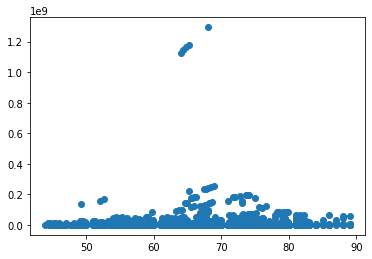

In [132]:
plt.scatter(data['life expectancy'], data['Population'])